In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

In [35]:
from enum import Enum

class FieldKeys(Enum):
    """Fields present in the form"""
    FACILITY_NAME = 1  # "facility_name"
    FACILITY_CODE = 2  # "facility_code"
    FIRST_NAME = 3  # "first_name"
    MIDDLE_NAME = 4  # "middle_name"
    RACE_AIOAN = 5  # "race_american_indian_or_alaska_native"
    LAST_NAME = 6  # "last_name"
    RACE_BOAA = 7  # "race_black_or_african_american"
    RACE_NHOPI = 8  # "race_native_hawaiian_or_pacific_islander"
    RACE_ASIAN = 9  # "race_asian"
    DOB_MONTH = 10  # "date_of_birth_month"
    DOB_DAY = 11  # "date_of_birth_day"
    DOB_YEAR = 12  # "date_of_birth_year"
    RACE_WHITE = 13  # "race_white"
    SEX_M = 14  # "sex_male"
    SEX_F = 15  # "sex_female"
    SEX_O = 16  # "sex_other"
    RACE_OTHER = 17  # "race_other"
    COLLECT_HOUR = 18  # "speciman_collection_date_hour"
    COLLECT_MINUTE = 19  # "speciman_collection_date_minute"
    COLLECT_AM = 20  # "speciman_collection_date_am"
    COLLECT_PM = 21  # "speciman_collection_date_pm"
    COLLECT_MONTH = 22  # "speciman_collection_date_month"
    COLLECT_DAY = 23  # "speciman_collection_date_day"
    COLLECT_YEAR = 24  # "speciman_collection_date_year"
    ETHNIC_HOL = 25  # "ethnicity_hispanic_or_latino"
    ETHNIC_NOL = 26  # "ethnicity_nonhispanic_or_latino"
    SWAB_BARCODE = 27  # "swab_tube_barcode_label"
    PHYSICIAN_NAME = 28  # "requesting_physician_name"
    PHYSICIAN_PHONE = 29  # "physician_phone_number"
    PATIENT_SYMPTO = 30  # "patient_is_symptomatic"
    PHYSICIAN_EMAIL = 31  # "requesting_physician_email"
    PATIENT_NON_SYMPTO = 32  # "patient_is_asymptomatic"
    PHYSICIAN_FAX = 33  # "requesting_physician_secure_fax"
    PHYSICIAN_NPI = 34  # "requesting_physician_npi"
    PATIENT_IS_STAFF = 35  # "patient_is_staff"
    PATIENT_IS_RESIDENT = 36  # "patient_is_resident"
    
#for name, member in FieldKeys.__members__.items():
#    print(name,member,member.value,member.name)
    
for member in FieldKeys:
    print(member, member.name, member.value)
    

FieldKeys.FACILITY_NAME FACILITY_NAME 1
FieldKeys.FACILITY_CODE FACILITY_CODE 2
FieldKeys.FIRST_NAME FIRST_NAME 3
FieldKeys.MIDDLE_NAME MIDDLE_NAME 4
FieldKeys.RACE_AIOAN RACE_AIOAN 5
FieldKeys.LAST_NAME LAST_NAME 6
FieldKeys.RACE_BOAA RACE_BOAA 7
FieldKeys.RACE_NHOPI RACE_NHOPI 8
FieldKeys.RACE_ASIAN RACE_ASIAN 9
FieldKeys.DOB_MONTH DOB_MONTH 10
FieldKeys.DOB_DAY DOB_DAY 11
FieldKeys.DOB_YEAR DOB_YEAR 12
FieldKeys.RACE_WHITE RACE_WHITE 13
FieldKeys.SEX_M SEX_M 14
FieldKeys.SEX_F SEX_F 15
FieldKeys.SEX_O SEX_O 16
FieldKeys.RACE_OTHER RACE_OTHER 17
FieldKeys.COLLECT_HOUR COLLECT_HOUR 18
FieldKeys.COLLECT_MINUTE COLLECT_MINUTE 19
FieldKeys.COLLECT_AM COLLECT_AM 20
FieldKeys.COLLECT_PM COLLECT_PM 21
FieldKeys.COLLECT_MONTH COLLECT_MONTH 22
FieldKeys.COLLECT_DAY COLLECT_DAY 23
FieldKeys.COLLECT_YEAR COLLECT_YEAR 24
FieldKeys.ETHNIC_HOL ETHNIC_HOL 25
FieldKeys.ETHNIC_NOL ETHNIC_NOL 26
FieldKeys.SWAB_BARCODE SWAB_BARCODE 27
FieldKeys.PHYSICIAN_NAME PHYSICIAN_NAME 28
FieldKeys.PHYSICIAN_PHONE

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from MODULES.unet_parts import MLP_1by1

In [31]:
class PredictBackground(nn.Module):
    """ Predict the bg_mu in (0,1) by applying sigmoid"""
    def __init__(self, ch_in: int, ch_out: int):
        super().__init__()
        self.predict = MLP_1by1(ch_in=ch_in, ch_out=ch_out)

    def forward(self, x: torch.Tensor, background_resolution: tuple, output_resolution: tuple) -> torch.Tensor:
        bg_mu = torch.sigmoid(self.predict(x))
        print(bg_mu.shape)
        small_bg_mu = F.interpolate(bg_mu, size=background_resolution, mode='bilinear', align_corners=True)
        print(small_bg_mu.shape)
        return F.interpolate(small_bg_mu, size=output_resolution, mode='bilinear', align_corners=True)


small_size, small_size, large_w, large_h = 5,5,80,80
bath_size, ch, w, h = 1,3,5,5
x = torch.randn((bath_size, ch, w, h))
predict_bg = PredictBackground(ch_in=ch, ch_out=1)
bg = predict_bg(x, background_resolution=(small_size, small_size), output_resolution=(large_w, large_h))

torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 5, 5])


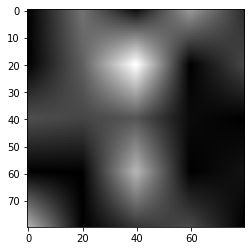

In [30]:
plt.imshow(bg[0,0].detach().cpu(), cmap='gray')